<a href="https://colab.research.google.com/github/Baobui19112001/BaiTapCNN/blob/main/10_MonAnVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread


In [ ]:
model=Sequential() #CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten()) #ANN
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 72, 72, 64)      

In [ ]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/AI/10-MonAnVN/Train/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/AI/10-MonAnVN/Validation/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 95 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [ ]:
validation_dataset.class_indices 


{'Banh bao': 0,
 'Banh cuon': 1,
 'Banh gio': 2,
 'Banh mi': 3,
 'Banh tet': 4,
 'Banh xeo': 5,
 'Chao long': 6,
 'Com tam': 7,
 'Goi cuon': 8,
 'Hu tieu': 9}

In [ ]:
history=model.fit(train_dataset,batch_size=10,epochs=20,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/20
10/10 [==============================] - 8s 821ms/step - loss: 0.9306 - accuracy: 0.6842
Epoch 2/20
10/10 [==============================] - 7s 733ms/step - loss: 1.1581 - accuracy: 0.6211
Epoch 3/20
10/10 [==============================] - 7s 713ms/step - loss: 1.0395 - accuracy: 0.6211
Epoch 4/20
10/10 [==============================] - 8s 711ms/step - loss: 0.9924 - accuracy: 0.7053
Epoch 5/20
10/10 [==============================] - 8s 773ms/step - loss: 0.7969 - accuracy: 0.6842
Epoch 6/20
10/10 [==============================] - 8s 826ms/step - loss: 0.9343 - accuracy: 0.6632
Epoch 7/20
10/10 [==============================] - 8s 760ms/step - loss: 1.1222 - accuracy: 0.6105
Epoch 8/20
10/10 [==============================] - 8s 779ms/step - loss: 1.0908 - accuracy: 0.6526
Epoch 9/20
10/10 [==============================] - 8s 782ms/step - loss: 0.9267 - accuracy: 0.6842
Epoch 10/20
10/10 [==============================] - 8s 713ms/step - loss: 1.0334 - accuracy: 0.6526

In [ ]:
from keras.models import load_model
model.save('10monan.h5')


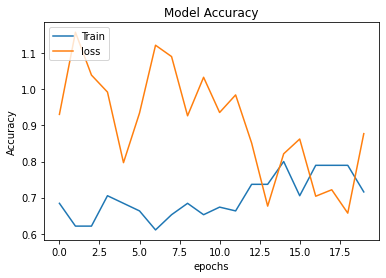

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss'],loc='upper left')
plt.show()

In [ ]:
classes=['Com Tam',
 'Chao long',
 'Hu tieu',
 'Banh mi',
 'Banh tet',
 'Banh Xeo',
 'Banh bao',
 'Banh cuon',
 'Goi cuon',
 'Banh gio']


Com Tam


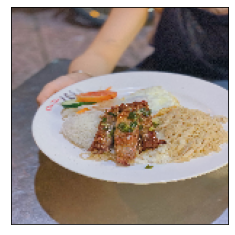

In [ ]:
filename = '/content/drive/MyDrive/AI/10-MonAnVN/Validation/Com tam/Comtam 4.jpg'  
img=load_img(filename,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Banhxeo


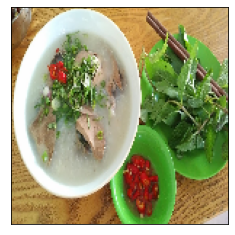

In [ ]:
filename = '/content/drive/MyDrive/AI/10-MonAnVN/Validation/Chao long/Chaolong 1.jpg'  
img=load_img(filename,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Hu tieu


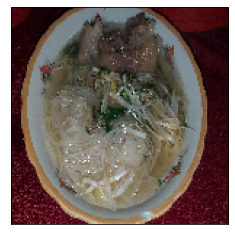

In [ ]:
filename = '/content/drive/MyDrive/AI/10-MonAnVN/Validation/Hu tieu/Hutieu 3.jpg'  
img=load_img(filename,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Banh xeo


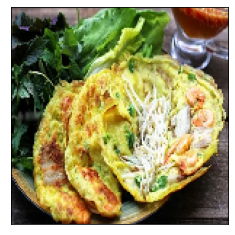

In [ ]:
filename = '/content/banhxeo.png'  
img=load_img(filename,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])